# Subsidized Housing Program


Importing basic stuff

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

Loading data set:

In [2]:
shp = pd.read_csv('SubsidizedHousingProgram.csv')
print(shp.head(10))

   Lottery Number         City  Number of Apartments  Number of Participants  \
0            2470        Eilat                    72                    4247   
1            2471        Eilat                    60                    4169   
2            2472        Eilat                    48                    4086   
3            2473        Eilat                    32                    4007   
4            2474        Eilat                    29                    4030   
5            2491        Efrat                    25                     892   
6            2479  Beith-Shean                    68                    2563   
7            2480  Beith-Shean                    57                    2579   
8            2481  Beith-Shean                    55                    2538   
9            2482  Beith-Shean                    49                    2493   

     PpM  
0  12206  
1  12206  
2  12206  
3  12206  
4  12206  
5  13104  
6   7305  
7   7294  
8   7305  
9   7305 

## Cleaning Data 

We'd like to change cities name from Hebrew to English:

In [49]:
shp_cities_df = pd.DataFrame(shp)

# Dictionary to change hebrew names into english
translation_dict = {
    'אילת': 'Eilat',
    'ביתשמש': 'Beith-Shemesh',
    'ביתשאן': 'Beith-Shean',
    'אפרת' : 'Efrat',
    'בניעי"ש': 'Bnei Ayish',
    'דימונה': 'Dimona',
    'טירתכרמל': 'Tirat Carmel',
    'יהוד': 'Yahud',
    'כפרסבא': 'Kfar Saba',
    'צורהדסה': 'Tzur Hadassa',
    'קרייתמלאכי': 'Kiryat Malakhi',
    'קרייתגת': 'Kiryat Gat',
    'ראשוןלציון': 'Rishon LeZiyon',
    'רכסים': 'Rechasim'
}

# Using for loop to change values in the column
for hebrew, english in translation_dict.items():
    shp_cities_df['City'] = shp_cities_df['City'].replace(hebrew, english)

# Printing new distinct values to make sure everything is alright. 
print(shp_cities_df['City'].unique())

#Writing Changes to source file
shp_cities_df.to_csv('SubsidizedHousingProgram.csv', index=False)


['Eilat' 'Efrat' 'Beith-Shean' 'Beith-Shemesh' 'Bnei Ayish' 'Dimona'
 'Tirat Carmel' 'Yahud' 'Kfar Saba' 'Tzur Hadassa' 'Kiryat Gat'
 'Kiryat Malakhi' 'Rishon LeZiyon' 'Rechasim']


Now, we need to remove the decimals from the "Price-per-meter" and "Number of apartments" columns.

In [ ]:
# Function to remove decimals from specific columns
def remove_decimals(df, columns):
    for column in columns:
        # Remove commas and convert to float before converting to int
        df[column] = df[column].apply(lambda x: int(float(str(x).replace(',', ''))) if pd.notna(x) else x)
    return df

# Read CSV file
shp = pd.read_csv('SubsidizedHousingProgram.csv')

# Remove decimals from specified columns
columns_to_modify = ['PpM', 'Number of Apartments']
shp = remove_decimals(shp, columns_to_modify)

# Print the first 10 rows to check the changes
print(shp.head(10))
shp.to_csv('SubsidizedHousingProgram.csv', index=False)

## Statistics

Now, we will try to find the lottery with the highest probability of winning

In [4]:
shp['Winning Probability'] = shp['Number of Apartments'] / shp['Number of Participants']

# Find the lottery with the highest winning probability
highest_probability_row = shp.loc[shp['Winning Probability'].idxmax()]

print("\nLottery with the highest winning probability:")
print(highest_probability_row)


Lottery with the highest winning probability:
Lottery Number                     2446
City                      Beith-Shemesh
Number of Apartments                422
Number of Participants            11105
PpM                               14644
Winning Probability            0.038001
Name: 11, dtype: object


Calculation of chances for eatch city:

In [5]:
# Group by 'City' to calculate the total number of apartments in each city
total_apartments_per_city = shp.groupby('City')['Number of Apartments'].sum()

# Group by 'City' to find the maximum number of participants in each city
max_participants_per_city = shp.groupby('City')['Number of Participants'].max()

# Calculate the probability of winning in each city by dividing the total apartments by the maximum number of participants
city_winning_probability = total_apartments_per_city / max_participants_per_city

city_winning_probability.sort_values(ascending=False).head(5)


City
Beith-Shemesh    0.194075
Beith-Shean      0.106630
Bnei Ayish       0.085479
Eilat            0.056746
Tzur Hadassa     0.036718
dtype: float64

Calculate average:

In [6]:
average_winning_probability = city_winning_probability.mean()
print(average_winning_probability)

0.046354831401587956


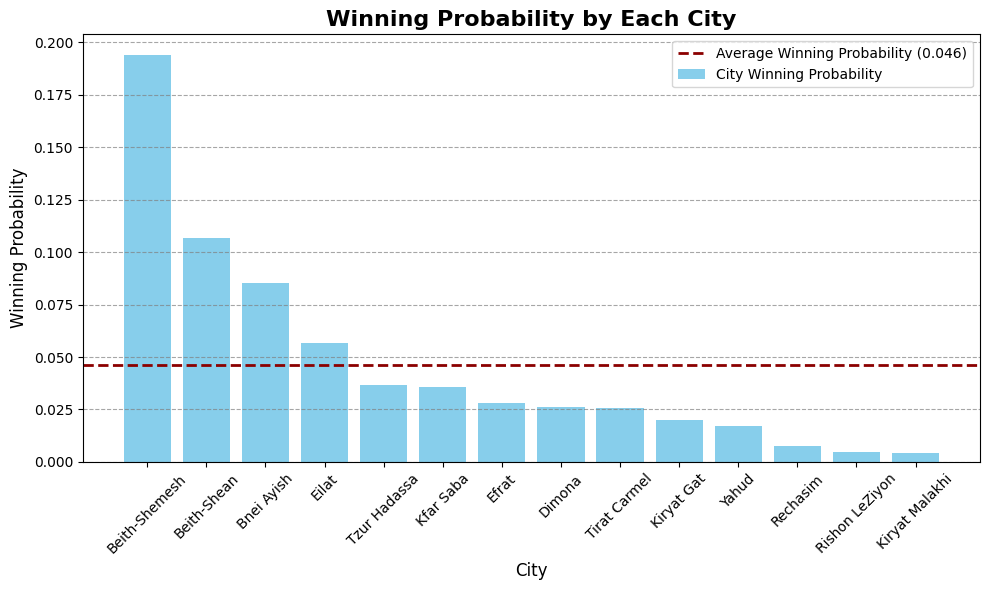

In [7]:
# Sorting city_winning_probability in descending order
city_winning_probability1 = city_winning_probability.sort_values(ascending=False)

# Plotting the sorted data
plt.figure(figsize=(10, 6))
plt.bar(city_winning_probability1.index, city_winning_probability1, color='skyblue', label='City Winning Probability')

# adding average line
plt.axhline(average_winning_probability, color='darkred', linestyle='--', linewidth=2,
             label=f'Average Winning Probability ({average_winning_probability:.3f})')

plt.title('Winning Probability by Each City', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Winning Probability', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')

plt.legend()

plt.tight_layout()
plt.show()


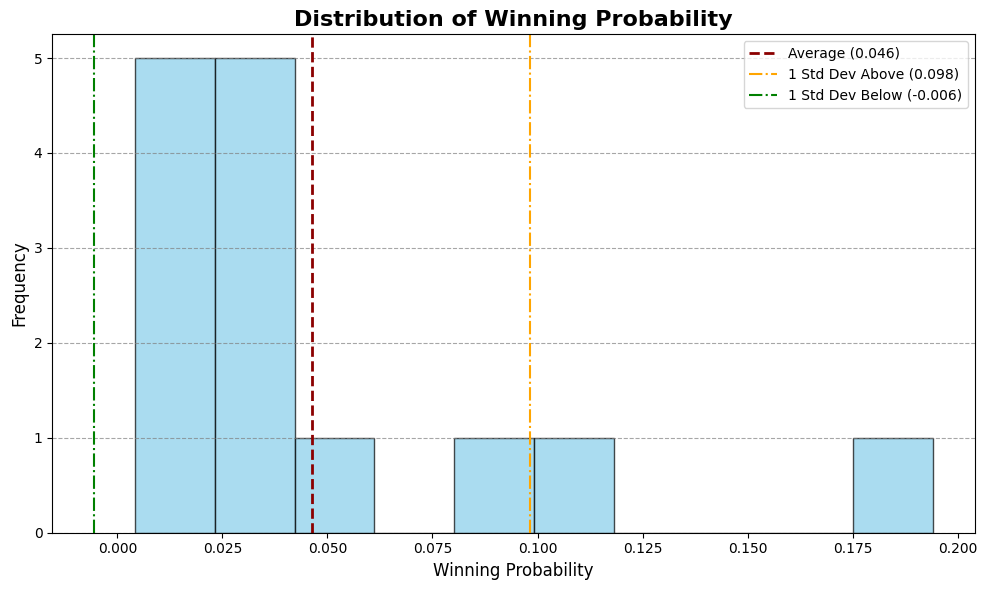

In [8]:
# Calculating standard deviation of winning probability
std_dev_winning_probability = city_winning_probability.std()

plt.figure(figsize=(10, 6))
plt.hist(city_winning_probability, bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Adding average line
plt.axvline(average_winning_probability, color='darkred', linestyle='--', linewidth=2, label=f'Average ({average_winning_probability:.3f})')

# Adding lines for 1 standard deviation above and below the average
plt.axvline(average_winning_probability + std_dev_winning_probability, color='orange', linestyle='-.', linewidth=1.5, label=f'1 Std Dev Above ({average_winning_probability + std_dev_winning_probability:.3f})')
plt.axvline(average_winning_probability - std_dev_winning_probability, color='green', linestyle='-.', linewidth=1.5, label=f'1 Std Dev Below ({average_winning_probability - std_dev_winning_probability:.3f})')

plt.title('Distribution of Winning Probability', fontsize=16, fontweight='bold')
plt.xlabel('Winning Probability', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')

plt.legend()

plt.tight_layout()
plt.show()


In [9]:
average_ppm_per_city = shp.groupby('City')['PpM'].mean()
print(average_ppm_per_city)

City
Beith-Shean        7302.800000
Beith-Shemesh     14674.333333
Bnei Ayish        14756.250000
Dimona             7722.000000
Efrat             13104.000000
Eilat             12206.000000
Kfar Saba         20202.750000
Kiryat Gat        13808.000000
Kiryat Malakhi    11538.000000
Rechasim          12645.000000
Rishon LeZiyon    20384.000000
Tirat Carmel      13919.000000
Tzur Hadassa      16204.000000
Yahud             22901.000000
Name: PpM, dtype: float64


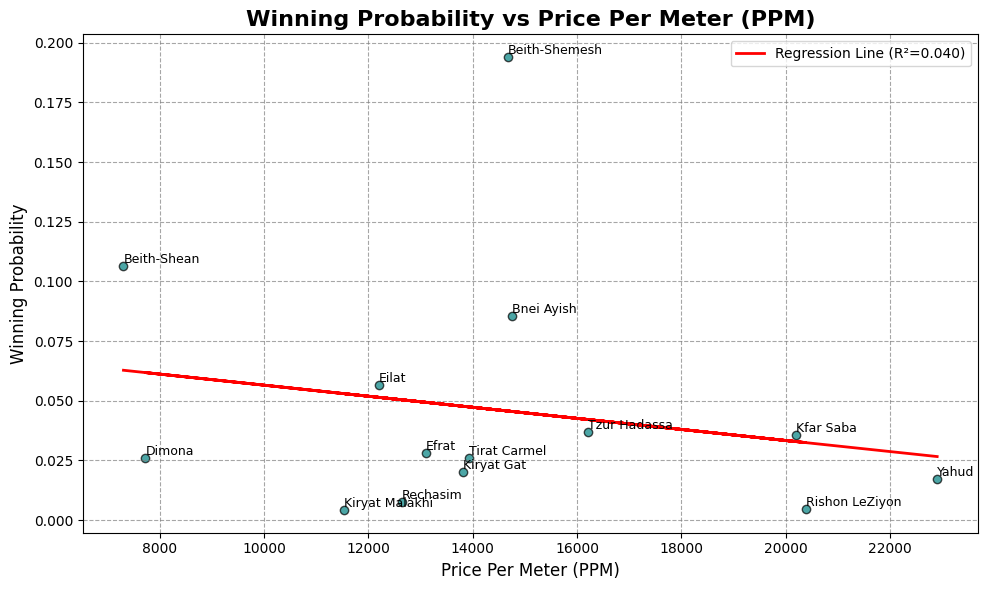

In [10]:
from scipy.stats import linregress

# Ensure synchronization by resetting the index and creating a unified DataFrame
combined_df = pd.DataFrame({
    'City': city_winning_probability.index,
    'Price Per Meter': average_ppm_per_city,
    'Winning Probability': city_winning_probability
}).reset_index(drop=True)

# Calculate linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(combined_df['Price Per Meter'], combined_df['Winning Probability'])

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot with text labels for each city
plt.scatter(combined_df['Price Per Meter'], combined_df['Winning Probability'], color='teal', alpha=0.7, edgecolor='black')
for i in range(len(combined_df)):
    plt.text(combined_df['Price Per Meter'][i], combined_df['Winning Probability'][i], combined_df['City'][i], fontsize=9, ha='left', va='bottom')

# Calculate regression line
regression_line = slope * combined_df['Price Per Meter'] + intercept

# Plot regression line
plt.plot(combined_df['Price Per Meter'], regression_line, color='red', linestyle='-', linewidth=2, label=f'Regression Line (R²={r_value**2:.3f})')

# Chart details
plt.title('Winning Probability vs Price Per Meter (PPM)', fontsize=16, fontweight='bold')
plt.xlabel('Price Per Meter (PPM)', fontsize=12)
plt.ylabel('Winning Probability', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.legend()

# Display the graph
plt.tight_layout()
plt.show()


# Correlation Between Number of Participants and Price per Meter:

Does the price per meter influence the number of participants? Is there a positive or negative correlation between them?

In [11]:
#correlation = shp['Number of Participants'].corr(shp['PpM'])
#correlation

print(shp['Number of Participants'].corr(shp['PpM']))

0.7831414815484257


# #Winning Probability vs. Number of Apartments:

Is there a trend in winning probability based on the total number of apartments? For example, does having more apartments significantly increase the probability of winning?

In [15]:
# Calculate the correlation between 'Winning Probability' and 'Number of Apartments'
# Assuming 'Winning Probability' has already been calculated and exists in the DataFrame
shp['Winning Probability'] = shp['Number of Apartments'] / shp['Number of Participants']

# Calculate the correlation between 'Winning Probability' and 'Number of Apartments'
correlation_wp_apartments = shp['Winning Probability'].corr(shp['Number of Apartments'])

correlation_wp_apartments


0.570471000590642

In [14]:
max_apartments = shp['Number of Apartments'].sum()
print(max_apartments)

4741


In [16]:
average_winning_probability = city_winning_probability.mean()
print(city_winning_probability.mean())

0.04635483140158796
